## CBOW 모델 구현

In [6]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

### 학습 코드 구현

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 214 |  반복 1 / 2 | 시간 0[s] | 손실 1.15
| 에폭 215 |  반복 1 / 2 | 시간 0[s] | 손실 1.30
| 에폭 216 |  반복 1 / 2 | 시간 0[s] | 손실 1.19
| 에폭 217 |  반복 1 / 2 | 시간 0[s] | 손실 1.18
| 에폭 218 |  반복 1 / 2 | 시간 0[s] | 손실 1.21
| 에폭 219 |  반복 1 / 2 | 시간 0[s] | 손실 1.19
| 에폭 220 |  반복 1 / 2 | 시간 0[s] | 손실 1.17
| 에폭 221 |  반복 1 / 2 | 시간 0[s] | 손실 1.21
| 에폭 222 |  반복 1 / 2 | 시간 0[s] | 손실 1.17
| 에폭 223 |  반복 1 / 2 | 시간 0[s] | 손실 1.12
| 에폭 224 |  반복 1 / 2 | 시간 0[s] | 손실 1.28
| 에폭 225 |  반복 1 / 2 | 시간 0[s] | 손실 1.04
| 에폭 226 |  반복 1 / 2 | 시간 0[s] | 손실 1.23
| 에폭 227 |  반복 1 / 2 | 시간 0[s] | 손실 1.18
| 에폭 228 |  반복 1 / 2 | 시간 0[s] | 손실 1.16
| 에폭 229 |  반복 1 / 2 | 시간 0[s] | 손실 1.22
| 에폭 230 |  반복 1 / 2 | 시간 0[s] | 손실 1.10
| 에폭 231 |  반복 1 / 2 | 시간 0[s] | 손실 1.07
| 에폭 232 |  반복 1 / 2 | 시간 0[s] | 손실 1.19
| 에폭 233 |  반복 1 / 2 | 시간 0[s] | 손실 1.15
| 에폭 234 |  반복 1 / 2 | 시간 0[s] | 손실 1.18
| 에폭 235 |  반복 1 / 2 | 시간 0[s] | 손실 1.11
| 에폭 236 |  반복 1 / 2 | 시간 0[s] | 손실 1.14
| 에폭 237 |  반복 1 / 2 | 시간 0[s] | 손실 1.07
| 에폭 238 |  반복 1

| 에폭 540 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 541 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 542 |  반복 1 / 2 | 시간 0[s] | 손실 0.82
| 에폭 543 |  반복 1 / 2 | 시간 0[s] | 손실 0.73
| 에폭 544 |  반복 1 / 2 | 시간 0[s] | 손실 0.43
| 에폭 545 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 546 |  반복 1 / 2 | 시간 0[s] | 손실 0.96
| 에폭 547 |  반복 1 / 2 | 시간 0[s] | 손실 0.45
| 에폭 548 |  반복 1 / 2 | 시간 0[s] | 손실 0.63
| 에폭 549 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 550 |  반복 1 / 2 | 시간 0[s] | 손실 0.81
| 에폭 551 |  반복 1 / 2 | 시간 0[s] | 손실 0.72
| 에폭 552 |  반복 1 / 2 | 시간 0[s] | 손실 0.72
| 에폭 553 |  반복 1 / 2 | 시간 0[s] | 손실 0.55
| 에폭 554 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 555 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 556 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 557 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 558 |  반복 1 / 2 | 시간 0[s] | 손실 0.59
| 에폭 559 |  반복 1 / 2 | 시간 0[s] | 손실 0.68
| 에폭 560 |  반복 1 / 2 | 시간 0[s] | 손실 0.78
| 에폭 561 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 562 |  반복 1 / 2 | 시간 0[s] | 손실 0.59
| 에폭 563 |  반복 1 / 2 | 시간 0[s] | 손실 0.70
| 에폭 564 |  반복 1

| 에폭 813 |  반복 1 / 2 | 시간 1[s] | 손실 0.62
| 에폭 814 |  반복 1 / 2 | 시간 1[s] | 손실 0.49
| 에폭 815 |  반복 1 / 2 | 시간 1[s] | 손실 0.47
| 에폭 816 |  반복 1 / 2 | 시간 1[s] | 손실 0.57
| 에폭 817 |  반복 1 / 2 | 시간 1[s] | 손실 0.41
| 에폭 818 |  반복 1 / 2 | 시간 1[s] | 손실 0.61
| 에폭 819 |  반복 1 / 2 | 시간 1[s] | 손실 0.39
| 에폭 820 |  반복 1 / 2 | 시간 1[s] | 손실 0.63
| 에폭 821 |  반복 1 / 2 | 시간 1[s] | 손실 0.47
| 에폭 822 |  반복 1 / 2 | 시간 1[s] | 손실 0.43
| 에폭 823 |  반복 1 / 2 | 시간 1[s] | 손실 0.49
| 에폭 824 |  반복 1 / 2 | 시간 1[s] | 손실 0.55
| 에폭 825 |  반복 1 / 2 | 시간 1[s] | 손실 0.58
| 에폭 826 |  반복 1 / 2 | 시간 1[s] | 손실 0.38
| 에폭 827 |  반복 1 / 2 | 시간 1[s] | 손실 0.50
| 에폭 828 |  반복 1 / 2 | 시간 1[s] | 손실 0.62
| 에폭 829 |  반복 1 / 2 | 시간 1[s] | 손실 0.44
| 에폭 830 |  반복 1 / 2 | 시간 1[s] | 손실 0.45
| 에폭 831 |  반복 1 / 2 | 시간 1[s] | 손실 0.50
| 에폭 832 |  반복 1 / 2 | 시간 1[s] | 손실 0.42
| 에폭 833 |  반복 1 / 2 | 시간 1[s] | 손실 0.58
| 에폭 834 |  반복 1 / 2 | 시간 1[s] | 손실 0.61
| 에폭 835 |  반복 1 / 2 | 시간 1[s] | 손실 0.39
| 에폭 836 |  반복 1 / 2 | 시간 1[s] | 손실 0.50
| 에폭 837 |  반복 1

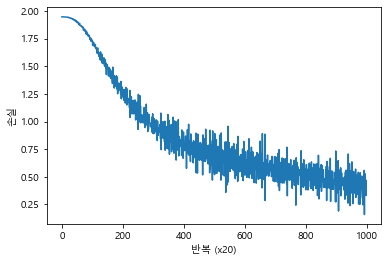

you [ 0.99797034 -0.9469261   1.0991559   1.7317547   0.9733251 ]
say [-0.25071776  1.2508137  -1.2577049  -0.34136647 -1.2698402 ]
goodbye [ 1.0800729  -1.1208452   0.92829406 -0.18722115  1.0641856 ]
and [-1.5255694  1.0040379 -1.0502566 -1.5232812 -1.0236406]
i [ 1.0311768  -1.0889199   0.9130475  -0.17443569  1.0392462 ]
hello [ 1.0250186  -0.94369966  1.0829033   1.7198641   0.9702409 ]
. [ 1.5455378  1.0854594 -1.0711194  1.4198967 -1.0863562]


In [9]:
import sys
sys.path.append('..')  
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])